In [1]:
import pandas as pd
S_data=pd.read_csv("50_Startups.csv")
#S_data.head()
data=S_data.rename(columns={'R&D Spend':'R_D_Spend','Marketing Spend':'Marketing_Spend'})
#data.head()

In [2]:
#Correlation Matrix
data.corr()

,R_D_Spend,Administration,Marketing_Spend,Profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


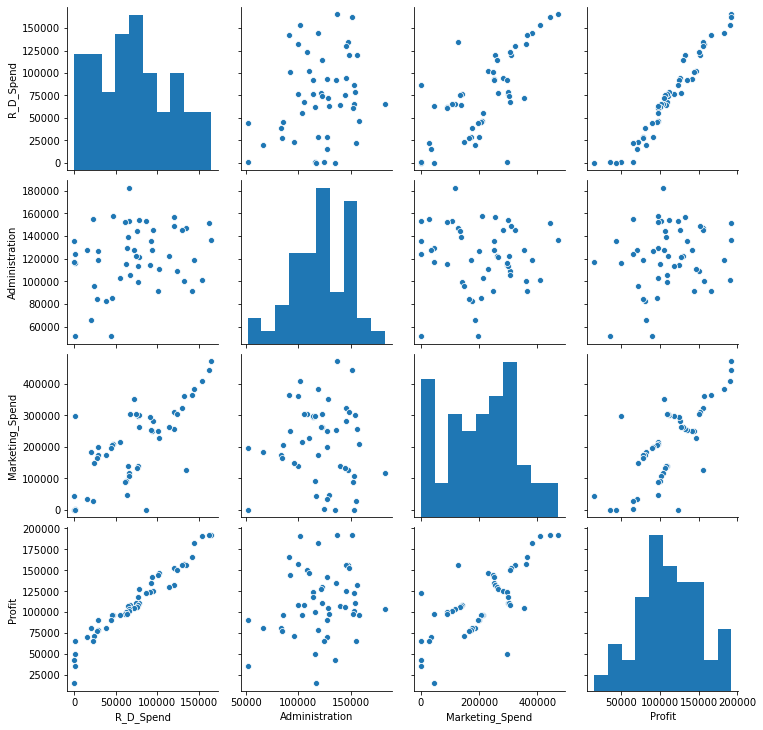

In [3]:
#Scatterplot between variables along with histogram
import seaborn as sns
sns.pairplot(data)

In [4]:
#Preparing  a first model
import statsmodels.formula.api as smf
model1=smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           4.53e-30
Time:                        15:34:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#Calculating VIF
rsq_rdspend=smf.ols('R_D_Spend~Administration+Marketing_Spend',data=data).fit().rsquared
vif_rdspend=1/(1-rsq_rdspend)

rsq_administration=smf.ols('Administration~R_D_Spend+Marketing_Spend',data=data).fit().rsquared
vif_administration=1/(1-rsq_administration)

rsq_marketingspend=smf.ols('Marketing_Spend~R_D_Spend+Administration',data=data).fit().rsquared
vif_marketingspend=1/(1-rsq_marketingspend)

d1={'Variables':['R_D_Spend','Administration','Marketing_Spend'],'VIF':[vif_rdspend,vif_administration,vif_marketingspend]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

#All variables VIF value is < 5 so no need to drop any column

,Variables,VIF
0,R_D_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


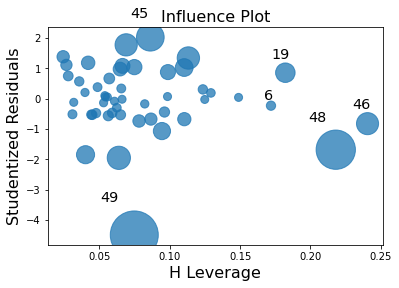

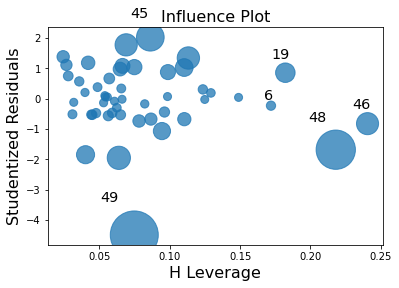

In [6]:
#Model1 Deletion Diagnostics
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [14]:
#Building Our second Model
data1=data.drop(data.index[46],axis=0)
model2=smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     278.7
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           4.57e-29
Time:                        15:46:04   Log-Likelihood:                -515.00
No. Observations:                  49   AIC:                             1038.
Df Residuals:                      45   BIC:                             1046.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.949e+04   6639.661      7.453      0.000    3.61e+04    6.29e+04
R_D_Spend           0.7860      0.051     15.357      0.000       0.683       0.889
Administration     -0.0194      0.052     -0.373      0.711      -0.124       0.085
Marketing_Spend     0.0337      0.018      1.845      0.072      -0.003       0.070
==============================================================================
Omnibus:                       16.402   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.938
Skew:                          -1.037   Prob(JB):                     3.84e-06
Kurtosis:                       5.812   Cond. No.                     1.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

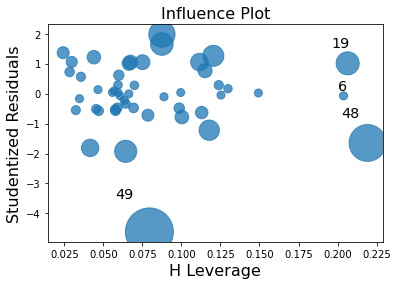

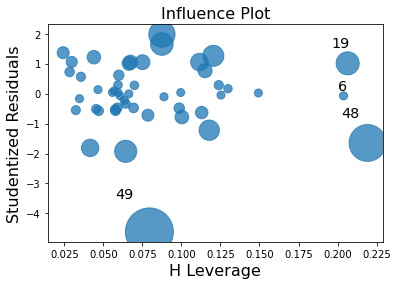

In [9]:
#Model2 Deletion Diagnostics
import statsmodels.api as sm
sm.graphics.influence_plot(model2)

In [12]:
#Building Our third Model
data2=data.drop(data.index[[46,49]],axis=0)
model3=smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     355.6
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           7.48e-31
Time:                        15:43:54   Log-Likelihood:                -495.51
No. Observations:                  48   AIC:                             999.0
Df Residuals:                      44   BIC:                             1007.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.158e+04   5529.944      9.328      0.000    4.04e+04    6.27e+04
R_D_Spend           0.7563      0.043     17.601      0.000       0.670       0.843
Administration     -0.0122      0.043     -0.282      0.779      -0.099       0.075
Marketing_Spend     0.0338      0.015      2.229      0.031       0.003       0.064
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.309
Skew:                          -0.110   Prob(JB):                        0.857
Kurtosis:                       2.674   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Storing R^2 values in a data frame
rsqr_model1=model1.rsquared
rsqr_model2=model2.rsquared
rsqr_model3=model3.rsquared

d1={'Model':['model1','model2','model3'],'R^2 values':[rsqr_model1,rsqr_model2,rsqr_model3]}
rsqr_frame=pd.DataFrame(d1)
rsqr_frame

#After analysis of all three model model3 have highest R^2 value so we consider model3 as our final model

,Model,R^2 values
0,model1,0.950746
1,model2,0.948924
2,model3,0.960392


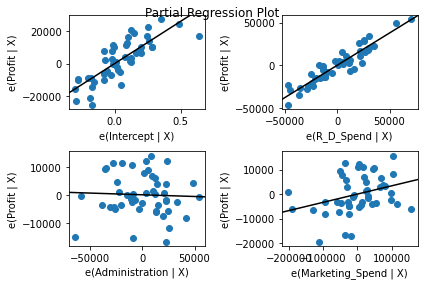

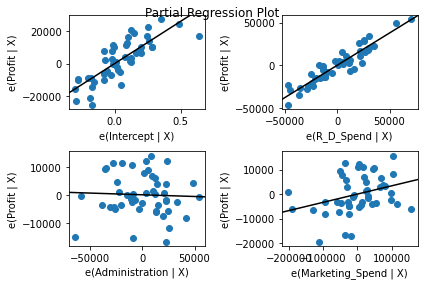

In [17]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model3)

In [18]:
profit_pred=model3.predict(data2[['R_D_Spend','Administration','Marketing_Spend']])
from ml_metrics import rmse
rmse(profit_pred,data2.Profit)

7362.426457437231

In [19]:
#Predicted Profit based on 'R_D_Spend','Administration','Marketing_Spend'
profit_pred.head()

0    190901.114167
1    187701.982404
2    180174.669694
3    172266.875360
4    170311.019102
dtype: float64

In [22]:
#Original Profit
data2.Profit.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

Text(0, 0.5, 'Predicted profit')

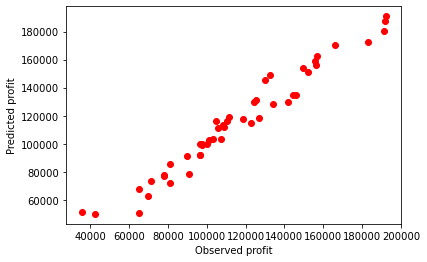

In [23]:
#Scatter plot of actual values vs predicted values
import matplotlib.pyplot as plt
plt.scatter(data2.Profit,profit_pred,c='r');plt.xlabel("Observed profit");plt.ylabel("Predicted profit")

Text(0, 0.5, 'residuals')

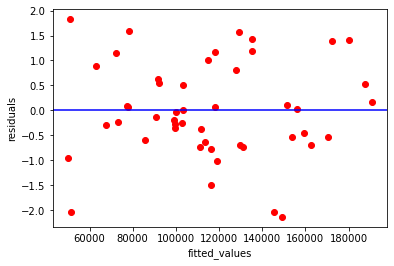

In [24]:
# Residuals VS Fitted Values 
plt.scatter(profit_pred,model3.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")

(array([ 3.,  1.,  2.,  7., 10.,  9.,  4.,  3.,  5.,  4.]),
 array([-2.13901602, -1.74260569, -1.34619537, -0.94978504, -0.55337472,
        -0.15696439,  0.23944593,  0.63585626,  1.03226658,  1.4286769 ,
         1.82508723]),
 <a list of 10 Patch objects>)

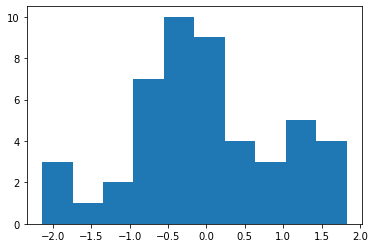

In [25]:
#Normality plot for residuals 
# histogram
plt.hist(model3.resid_pearson) 

((array([-2.18794508, -1.81466696, -1.5940389 , -1.43152593, -1.29991017,
         -1.18761792, -1.08858668, -0.99921942, -0.91719469, -0.84091983,
         -0.76924975, -0.7013297 , -0.63650166, -0.57424545, -0.51414026,
         -0.45583845, -0.39904728, -0.34351563, -0.28902427, -0.23537844,
         -0.18240202, -0.12993297, -0.07781945, -0.02591656,  0.02591656,
          0.07781945,  0.12993297,  0.18240202,  0.23537844,  0.28902427,
          0.34351563,  0.39904728,  0.45583845,  0.51414026,  0.57424545,
          0.63650166,  0.7013297 ,  0.76924975,  0.84091983,  0.91719469,
          0.99921942,  1.08858668,  1.18761792,  1.29991017,  1.43152593,
          1.5940389 ,  1.81466696,  2.18794508]),
  array([-2.13901602, -2.04030531, -2.03211628, -1.49282911, -1.01498934,
         -0.95888763, -0.77252614, -0.72714061, -0.72526583, -0.69811745,
         -0.68594363, -0.62902666, -0.60317586, -0.53617482, -0.53012108,
         -0.4602553 , -0.38078017, -0.35986248, -0.28956768, -

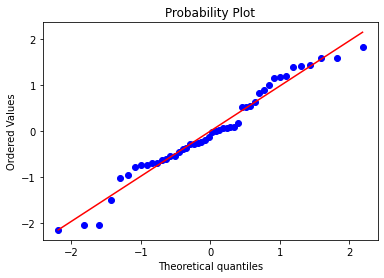

In [26]:
# QQ plot for residuals 
import pylab          
import scipy.stats as st
st.probplot(model3.resid_pearson, dist="norm", plot=pylab)

In [27]:
#Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
startup_train,startup_test  = train_test_split(data2,test_size = 0.2)

In [28]:
# preparing the model on train data 

model_train = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=startup_train).fit()

In [29]:
# train_data prediction
train_pred = model_train.predict(startup_train)

In [30]:
# train residual values 
train_resid  = train_pred - startup_train.Profit


In [31]:
# RMSE value for train data 
import numpy as np

train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse
#OR
#rmse(train_pred,corolla_train.Price)

7478.892599953935

In [32]:
# prediction on test data set 
test_pred = model_train.predict(startup_test)

In [33]:
# test residual values 
test_resid  = test_pred - startup_test.Profit

In [34]:
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse
#OR
#rmse(test_pred,startup_test.Profit)

7124.234978355595